In [1]:
import numpy as np
import pylandau
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import random

In [9]:
def MonteCarlo(ke, mE):
    mpv = dpdx(ke, 0.3, mE)
    eta, sigma, A = 1, 0.8, 1
    x = np.arange(0, 40, 0.03)
    y = pylandau.langau(x, mpv, eta, sigma, A)
    xr = 0
    yr = 0
    got = False
    
    while got==False:
        xr = random.uniform(0, 39.99)
        yr = random.uniform(0, 1.0)
        idx = (np.abs(xr - x)).argmin()
        if yr < y[idx]:
            got = True;

    return xr

In [10]:
def dedxBack(lowerLimit, UpperLimit, mE):
    EnergyList = []
    dedxList = []
    currEnergy = UpperLimit
    
    while currEnergy > lowerLimit:
        currdedx = MonteCarlo(currEnergy, mE)
        EnergyList.append(currEnergy)
        dedxList.append(currdedx)
        currEnergy = currEnergy - currdedx * 0.3

    return EnergyList, dedxList

In [ ]:
import csv

testList1 = np.array([])
testList2 = np.array([])
testList1, testList2 = dedxBack(5, 300, Mmu)

cts = 0
while cts < 1000:
    REnergy = random.uniform(299.0, 301)
    temp1, temp2 = dedxBack(5, REnergy, Mmu)
    testList1 = testList1 + temp1
    testList2 = testList2 + temp2
    cts += 1

data = [testList1, testList2]
data = np.array(data).T
with open('muon.txt', 'w') as f:
    csv.writer(f, delimiter=' ').writerows(data)

In [8]:
with open('muon_file.txt') as f:
    lines = f.readlines()
    fileColumn1 = np.array([line.split()[0] for line in lines])
    fileColumn2 = np.array([line.split()[1] for line in lines])

fileColumn1 = fileColumn1.astype(float)
fileColumn2 = fileColumn2.astype(float)

<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
/var/folders/lq/q0fl_kws2t9bqlvbbnsbp1qr0000gn/T/ipykernel_65435/1837943727.py:33: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Collision Stopping Power for $\mu$ in LAr',fontsize=16,fontweight='bold')
/var/folders/lq/q0fl_kws2t9bqlvbbnsbp1qr0000gn/T/ipykernel_65435/2036195175.py:85: RuntimeWarning: divide by zero encountered in divide
  F = K * (Z/A)*(1/b)**2
/var/folders/lq/q0fl_kws2t9bqlvbbnsbp1qr0000gn/T/ipykernel_65435/2036195175.py:87: RuntimeWarning: divide by zero encountered in log
  a0 = 0.5*np.log( 2*Me*(b*g)**2 * wmax / (I*I) )
/var/folders/lq/q0fl_kws2t9bqlvbbnsbp1qr0000gn/T/ipykernel_65435/2036195175.py:40: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(bg)


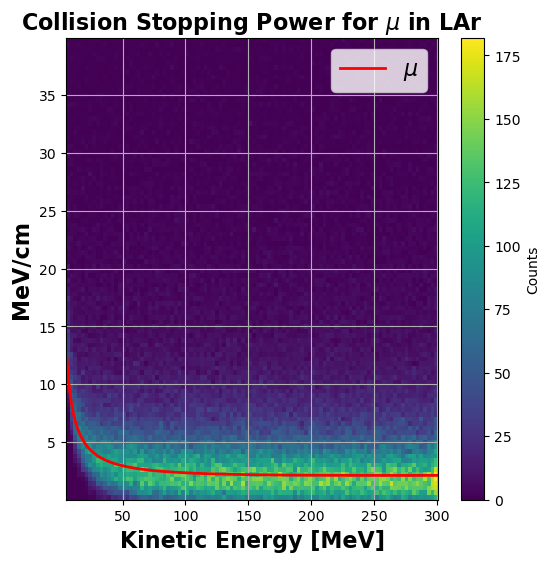

In [6]:
KEvals = np.linspace(0., 500., 500)
dedxvals = []
dedxvalspi = []
for KE in KEvals:
    dedxvals.append(rho * dedx(KE,Mmu,dens=True))
    dedxvalspi.append(rho * dedx(KE, 134.9766, dens=True))

fig = plt.figure(figsize=(6,6))
plt.plot(KEvals,dedxvals,color='r',lw=2,label='$μ$')
plt.grid(which='both')
plt.xlabel('Kinetic Energy [MeV]',fontsize=16,fontweight='bold')
plt.ylabel('MeV/cm',fontsize=16,fontweight='bold')
plt.ylim([0,50])
plt.legend(loc=1,fontsize=16)
plt.xlim([0,300])
plt.title('Collision Stopping Power for $\mu$ in LAr',fontsize=16,fontweight='bold')
plt.hist2d(fileColumn1, fileColumn2, bins=100)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()